# LIGO - Gravitational Waves Detectability

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import sys
sys.path.append(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\venv\Utilities")
from Utilities import plot_settings

Load downsampled data with balanced classes members

In [2]:
y = np.load(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\venv\Exam\LIGO\LIGO_Utils\Npy\y_ds.npy")

In [3]:
data = np.load(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\venv\Exam\LIGO\LIGO_Utils\Npy\data_ds.npy")

In [4]:
keys = np.load(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\venv\Exam\LIGO\LIGO_Utils\Npy\keys.npy")

Data needs to be scaled first

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
S = StandardScaler().fit_transform(data)

## Logistic Regression

In [7]:
from sklearn.model_selection import train_test_split
from Utilities.Classify_vs import evaluate_classifier_over_features, visualize_classification_generic
from sklearn.linear_model import LogisticRegression as LR

In [8]:
S_train, S_test, y_train, y_test = train_test_split(S, y, test_size=0.33, random_state=42)

Computing predictions using first 1 features...
Computing predictions using first 2 features...
Computing predictions using first 3 features...
Computing predictions using first 4 features...
Computing predictions using first 5 features...
Computing predictions using first 6 features...
Computing predictions using first 7 features...
Computing predictions using first 8 features...
Computing predictions using first 9 features...
Computing predictions using first 10 features...
Computing predictions using first 11 features...
Computing predictions using first 12 features...
Computing predictions using first 13 features...
Computing predictions using first 14 features...


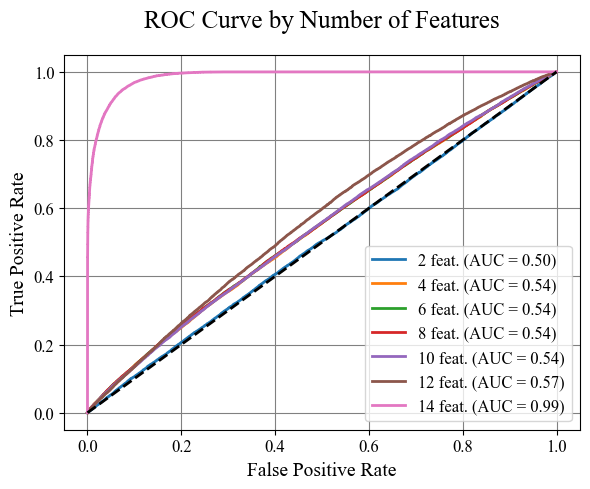

In [9]:
result = evaluate_classifier_over_features(S_train, S_test, y_train, y_test, LR())

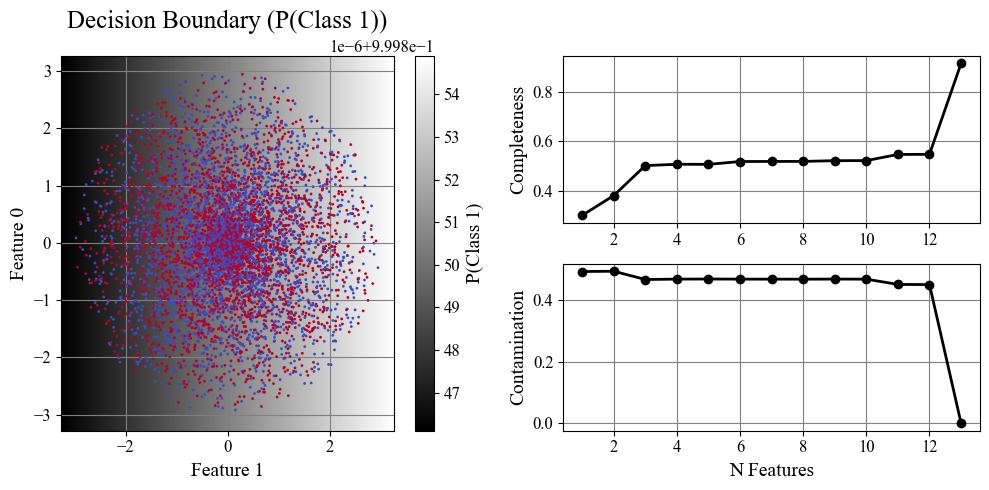

In [ ]:
visualize_classification_generic(S_test[:, :result['best_n_features']], y_test, result['best_classifier'],
                                 result['completeness'][:result['best_n_features']], result['contamination'][:result['best_n_features']])

## Support Vector Machine

In [20]:
from sklearn.svm import SVC

clf = SVC(probability=True, kernel='rbf', random_state=42)

In [ ]:
result = evaluate_classifier_over_features(S_train, S_test, y_train, y_test, clf)

best_clf = result['best_classifier']
best_n_features = result['best_n_features']

X_test_sub = S_test[:, :best_n_features]

visualize_classification_generic(S=X_test_sub, y_ds=y_test, clf=best_clf,
                                 completeness=result['completeness'],
                                 contamination=result['contamination'],
                                 f=10, a=0, b=1)

Computing predictions using first 1 features...


## Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from Utilities.Classify_vs import visualize_classification_generic_all, evaluate_classifier_over_features_all
clf = RandomForestClassifier(n_estimators=100, random_state=42)

Computing predictions on feature count: 14


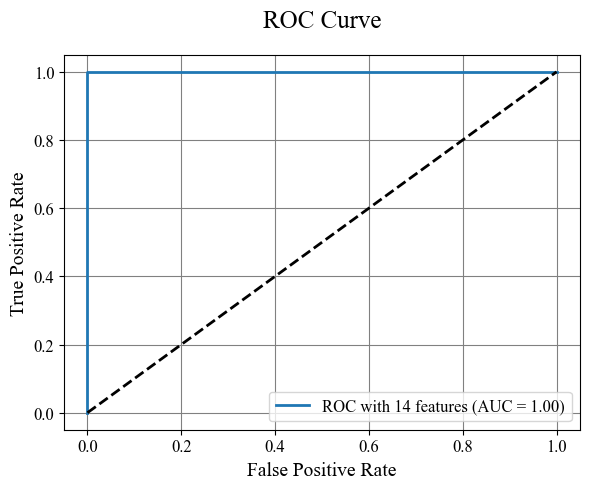

In [11]:
result = evaluate_classifier_over_features_all(S_train, S_test, y_train, y_test, clf)

In [ ]:
est_clf = result['best_classifier']
best_n_features = result['best_n_features']

X_test_sub = S_test[:, :best_n_features]

visualize_classification_generic(S=X_test_sub, y_ds=y_test, clf=best_clf,
                                 completeness=result['completeness'],
                                 contamination=result['contamination'],
                                 f=10, a=0, b=1)